In [3]:
import pandas as pd




In [4]:
df=pd.read_csv("/content/Wholesale customers data.csv")

In [5]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [6]:
df.shape

(416, 8)

In [7]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561.0,214.0,2674.0,1338.0
1,2,3,7057,9810,9568.0,1762.0,3293.0,1776.0
2,2,3,6353,8808,7684.0,2405.0,3516.0,7844.0
3,1,3,13265,1196,4221.0,6404.0,507.0,1788.0
4,2,3,22615,5410,7198.0,3915.0,1777.0,5185.0


In [8]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,416.000000,416.000000,416.000000,4.160000e+02,415.000000,415.000000,413.000000,414.000000
mean,1.322115,2.516827,12069.197115,3.144914e+05,7828.826506,3053.869880,2826.878935,1481.239130
std,0.467850,0.788291,12841.645888,6.297063e+06,9505.004592,4898.261377,4776.892505,2783.434106
min,1.000000,1.000000,3.000000,5.500000e+01,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3101.500000,1.483250e+03,2118.000000,740.500000,249.000000,409.500000
50%,1.000000,3.000000,8577.500000,3.616500e+03,4657.000000,1492.000000,761.000000,946.500000
75%,2.000000,3.000000,16933.750000,7.217500e+03,10479.000000,3512.500000,3881.000000,1783.000000
max,2.000000,3.000000,112151.000000,1.284411e+08,92780.000000,60869.000000,40827.000000,47943.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Channel           416 non-null    int64  
 1   Region            416 non-null    int64  
 2   Fresh             416 non-null    int64  
 3   Milk              416 non-null    int64  
 4   Grocery           415 non-null    float64
 5   Frozen            415 non-null    float64
 6   Detergents_Paper  413 non-null    float64
 7   Delicassen        414 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 26.1 KB


In [10]:
import numpy as np

def min_max_normalization(df, columns_to_normalize):
    """
    This function performs Min-Max normalization on the specified columns of the input DataFrame.
    """
    for col in columns_to_normalize:
        min_val = np.min(df[col])
        max_val = np.max(df[col])
        df[col] = (df[col] - min_val) / (max_val - min_val)
    return df

In [11]:

columns_to_normalize = ['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
normalized_df = min_max_normalization(df, columns_to_normalize)
print(normalized_df)

     Channel  Region     Fresh      Milk   Grocery    Frozen  \
0        1.0     1.0  0.112940  0.000075  0.081464  0.003106   
1        1.0     1.0  0.062899  0.000076  0.103097  0.028548   
2        1.0     1.0  0.056622  0.000068  0.082790  0.039116   
3        0.0     1.0  0.118254  0.000009  0.045464  0.104842   
4        1.0     1.0  0.201626  0.000042  0.077552  0.063934   
..       ...     ...       ...       ...       ...       ...   
411      0.0     1.0  0.000000  0.000093  0.172715  0.215469   
412      0.0     1.0  0.349761  0.000011  0.008202  0.073713   
413      1.0     1.0  0.129543  0.000120  0.325943  0.006771   
414      0.0     1.0  0.091727  0.000015  0.024025  0.016649   
415      0.0     1.0  0.024824  0.000013  0.027022  0.000657   

     Detergents_Paper  Delicassen  
0            0.065427    0.027847  
1            0.080590    0.036984  
2            0.086052    0.163559  
3            0.012346    0.037234  
4            0.043455    0.108093  
..             

In [12]:
X = normalized_df[columns_to_normalize]

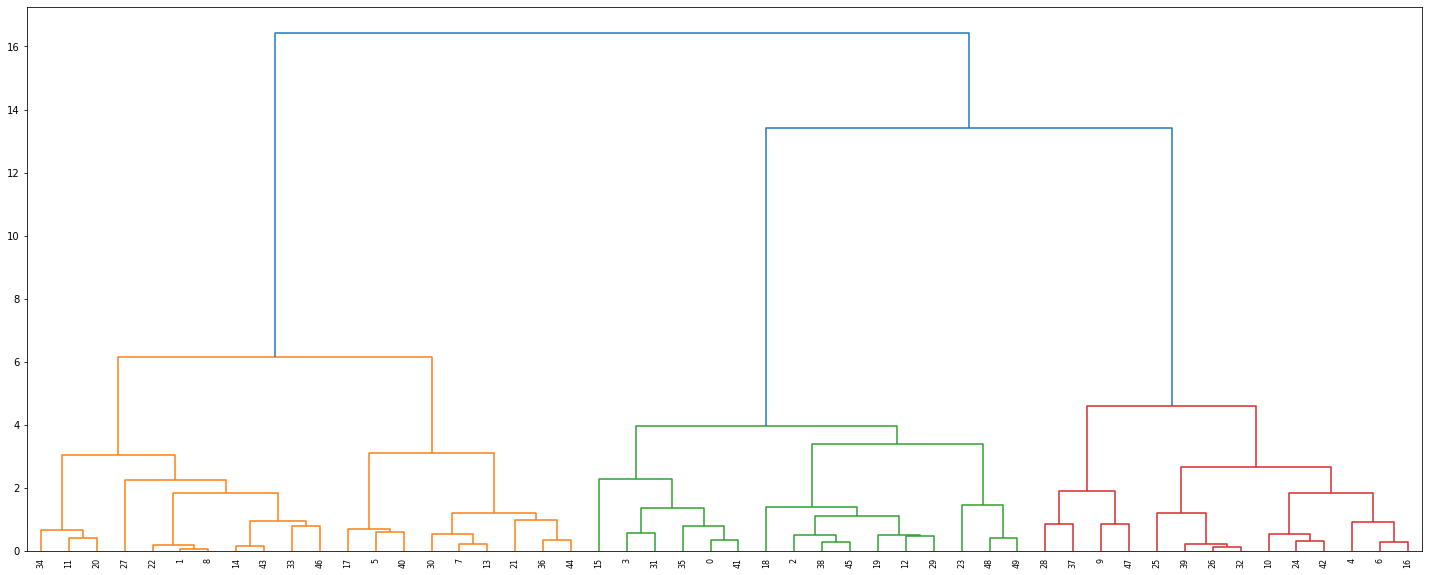

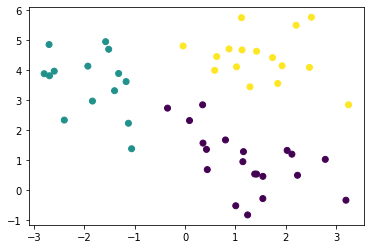

In [13]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate some random data
X, y = make_blobs(n_samples=50, centers=3, random_state=0)

# Perform agglomerative hierarchical clustering
model = AgglomerativeClustering(n_clusters=3)
model.fit(X)

# Plot the dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X, 'ward')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=model.labels_)
plt.show()

In [14]:
y

array([0, 1, 0, 0, 2, 0, 2, 2, 1, 2, 2, 1, 0, 1, 1, 0, 0, 2, 2, 0, 1, 1,
       1, 0, 2, 2, 2, 1, 2, 0, 1, 0, 2, 1, 1, 0, 1, 2, 0, 2, 1, 0, 2, 1,
       1, 0, 1, 2, 0, 0])